<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/IzhikevichNeuronPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurocomputing Assignment 3
## Dalhousie University
### Juan C. Reyes

In [0]:
from pylab import *
from matplotlib.pyplot import *
import numpy as np
from scipy.signal import find_peaks
%matplotlib inline

def eugene_izhikevic(tmax,dt,a,b,c,d,onC):
    # Initialize time parameters
    tmax = tmax
    dt = dt

    ##### Neuron parameters
    #a = 0.02
    #b = 0.2
    #c = -50
    #d = 2
    
    #create random number for external current noise
    random = 1*np.random.normal(0)

    #Define Initial Conditions 

    v = array([-70]) #Resting potential
    u = array([-14]) #Steady state
    peaks = []
    
    # For-loop over time.
    for t in arange(int(tmax / dt)):
        l = 0
        #if t*dt > 25 and t*dt < 125: l = 11 + random #incorporates noise with a random number
        if t*dt > 200 and t*dt < 800: l=onC  #without noise
        
        if v[-1] < 30:
            # Update DOE.
            dv = (0.04*np.power(v[-1],2)) + 5*v[-1] + 140 - u[-1] + l
            v = append(v,v[-1]+(dv*dt))
            du = a*(b*v[-1]-u[-1])
            u = append(u,u[-1] + dt*du)
        else:
            #Spike
            v[-1]=30
            v = append(v,c) #reset step
            u = append(u,u[-1] + d)

    #peak finder        
    peaks_locations = find_peaks(v,20)
    peaks.append(peaks_locations[0])

                 
    # Plot voltage trace
    
    figure()
    figure(figsize=(15,8))
    plot(v, 'b', label='Voltage trace')

    for peak,maxval in zip(peaks_locations[0],peaks_locations[1]["peak_heights"]):
        plot(peak,maxval, 'ro')


    xlabel('Time[0.5 ms]')
    ylabel('Membrane voltage [mV]')
    title('A single Izhikevich neuron with current step input')
    show()

Interesting parameter values:


*   Base Model : a=0.02, b=0.2, c=-65, d= 2
*   Fast Spiking: a=0.1, b=0.2, c=-65, d= 2
*   Regular Spiking with Large Reset: a=0.02, b=0.2, c=-65, d= 8
*   Bursting: a=0.01, b=0.2, c=-50, d= 2

<Figure size 432x288 with 0 Axes>

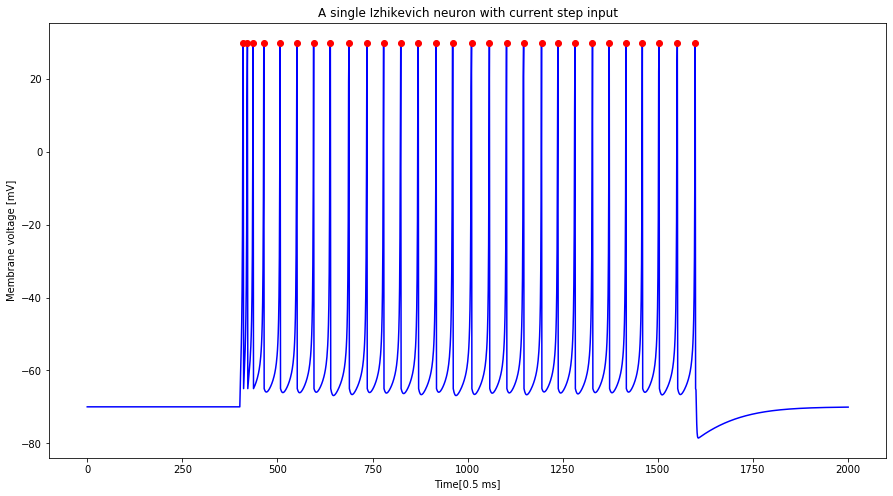

In [0]:
eugene_izhikevic(1000,0.5,0.02,0.2,-65,2,10)

# Another Izhikevic Implementation:

Global Parameters:


In [0]:
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 20000
input_amp=5    # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'yes'
#noise = 'no'

Generate Input Data:
Parameters: 
input_onset_on : the time the current is activated

input_onset_off : the time the current is de-activated

input_amp: the amplitude of the current

figure: The type of current generated {"step":step function,"sin":sinusoidal}

In [0]:
def Input(input_onset_on,input_onset_off,input_amp,figure,noise):
    
    I=np.zeros((len(time)))     # CURRENT (INPUT)
    #f = 5 #frequency of oscillation (Hertz)k
    #A = 20 #amplitude of oscillation
    if(figure == "step" and noise == "no"):
      for k in range (0,len(time)):
          
          if(input_onset_on < time[k] < input_onset_off):
              I[k]=input_amp
  
      return I

    elif(figure == "step" and noise == "yes"):
      for k in range (0,len(time)):
          
          if(input_onset_on < time[k] < input_onset_off):
              random = 1*np.random.normal(0)
              I[k]=input_amp + random
          else:
              random = 1*np.random.normal(0)
              I[k] = random
  
      return I

    if(figure == "sin" and noise == "no"):
      for k in range (0,len(time)):
         
          if(input_onset_on < time[k] < input_onset_off):              
              I[k]=input_amp + 0.1*input_amp*np.sin(2*np.pi*0.01*time[k])
              
      return I

    elif(figure == "sin" and noise == "yes"):
      for k in range (0,len(time)):
         
          if(input_onset_on < time[k] < input_onset_off): 
              random = 1*np.random.normal(0)              
              I[k]=input_amp + 0.1*input_amp*np.sin(2*np.pi*0.01*time[k]) + random
          else:
              random = 1*np.random.normal(0)
              I[k] = random
              
      return I

Plot the step function:

In [0]:
def plot_current():
 
  fig, ax1 = plt.subplots(figsize=(12,3))

  ax1.plot(time, Input(input_onset_on,input_onset_off,input_amp,figure=figure,noise=noise), 'b-') # y label

  ax1.set_xlabel('time (s)',color='b') # x label
  # Make the y-axis label, ticks and tick labels match the line color.
  ax1.set_ylabel('Input mV', color='b')
  ax1.set_ylim(0,input_amp*2) # setting the plotting range
  plt.title('Figure 2: Input to the system')
  plt.show()   

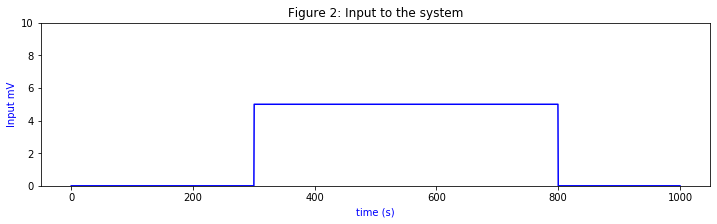

In [156]:
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5   # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'
#noise = 'no'
plot_current()

In [0]:
# Numerical Solution to the Izhikevich model
def Diff_Eqns(a,b,u,v,I):
    v = v + h *(0.04*v*v+5*v+140-u+I) # Discrete form of membrane potential of the neuron 
    u = u + h *(a*(b*v-u))            # Discrete form of membrane recovery variable
    return u,v  

def Izhikevich(a,b,c,d,result):
    v=-65*np.ones((len(time)))  # SETS UP THE INITIAL VALUES of the membrane potential
    u=0*np.ones((len(time)))    # SETS UP THE INITIAL VALUES of the membrane recovery
    u[0]=b*v[0]                 # INITIAL CONDITION 
    peaks = []                  # Initialize Peaks array to store location of where peaks are

    
    ##Generate our current##
    I=Input(input_onset_on,input_onset_off,input_amp,figure,noise)

    # EULER METHOD INTEGRATION
    for k in range (0,len(time)-1):
        u[k+1],v[k+1]=Diff_Eqns(a,b,u[k],v[k],I[k]) # Numerically solving the equations at each time point
        ##The Reset   
        if v[k+1]>30:
            v[k+1]=c
            u[k+1]=u[k+1]+d

    #peak finder        
    peaks_locations = find_peaks(v,-20)
    peaks.append(peaks_locations[0])

  
    if(result=="graph"):
       plot_input_output(time,v,I,a,b,c,d,peaks_locations)  
    elif(result=="data"):
      return (u,v,peaks_locations)



In [0]:
def plot_input_output(time,v,I,a,b,c,d,peaks):   
    # PLOTTING

    
    #AX1
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.plot(time, v, 'b-', label = 'Output')
    
    #for peak,maxval in zip(peaks_locations[0],peaks_locations[1]["peak_heights"]):
    for peak,maxval in zip(peaks[0],peaks[1]["peak_heights"]):
        ax1.plot(h*peak,maxval, 'ro')

    ax1.set_xlabel('time (ms)')
    # Make the y-axis label, ticks and tick labels match the line color.
    # Plotting out put 
    ax1.set_ylabel('Output mV', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(-95,40)
    
    #AX2
    ax2 = ax1.twinx()
    # Plotting input on a different axis
    ax2.plot(time, I, 'r', label = 'Input')
    ax2.set_ylim(0,input_amp*5)
    ax2.set_ylabel('Input (mV)', color='r')
    ax2.tick_params('y', colors='r')
    
    fig.tight_layout()
    ax1.legend(loc=1)
    ax2.legend(loc=3)
    ax1.set_title('Parameters a %s b: %s c:  %s d:  %s' %(a,b,c,d))
    plt.show()

We study different types of neuronal firing.

Output of the model is v(mV) in blue and our input current , (mA) in red as a function of time in milliseconds (ms). 

Model parameters:

a = time scale of recovery variable

b = sensitivity of the recovery variable to fluctuations of the membrane potential

c = voltage reset parameter

d = reset of the recovery variable


# Excitatory Cortical Cells:

a = 0.02, b = 0.2 , c = -65, d = 8


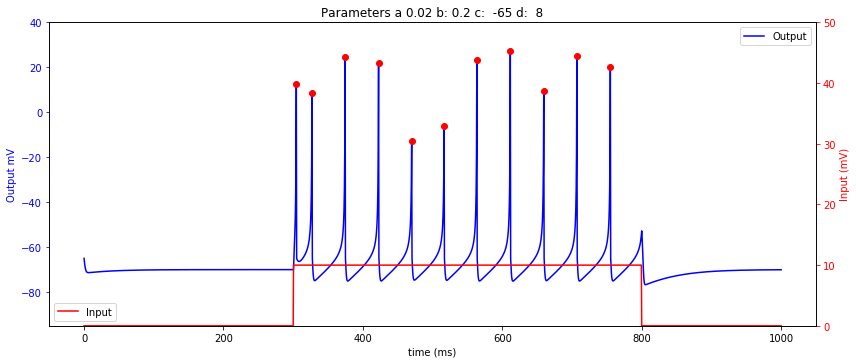

In [157]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=10 # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 8

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


## Intrinsically Bursting


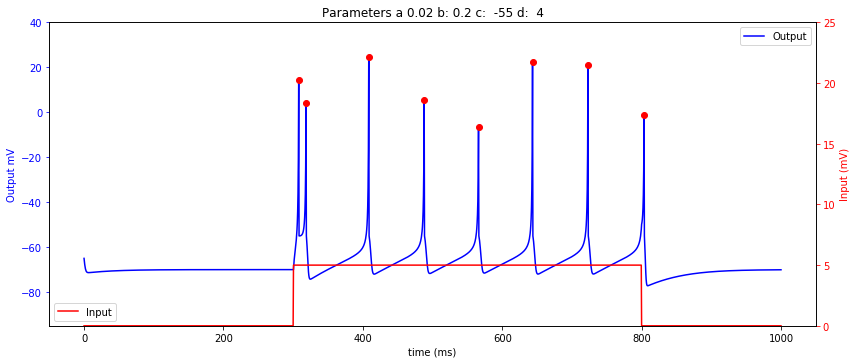

In [144]:
#@title a = 0.02, b = 0.2 , c = -55, d = 4
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -55
d = 4

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Chattering


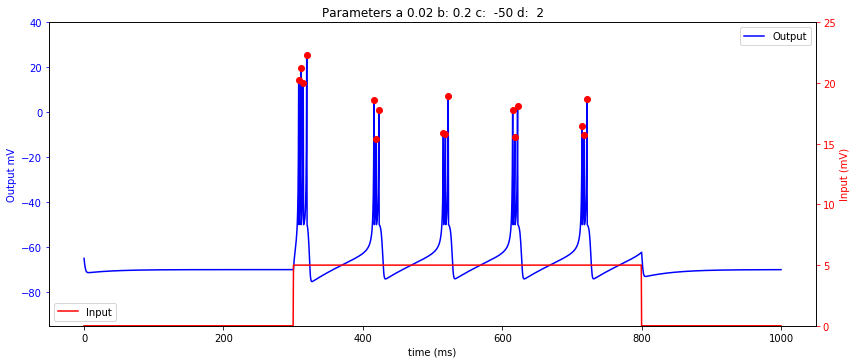

In [0]:
#@title a = 0.02, b = 0.2 , c = -50, d = 2
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.2
c = -50
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Inhibitory Cortical Cells:
## Fast Spiking


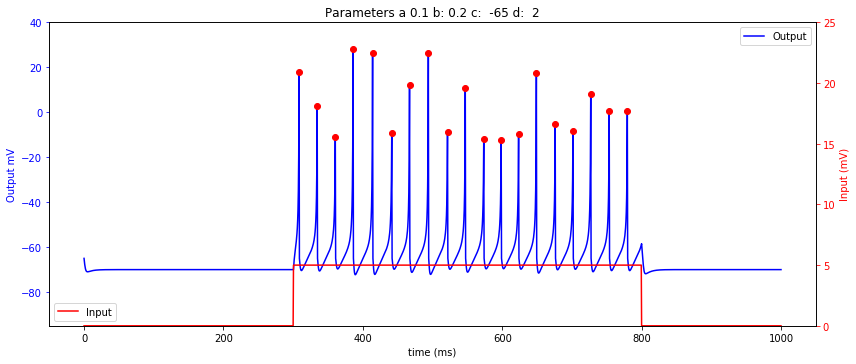

In [147]:
#@title a = 0.1, b = 0.2 , c = -65, d = 2
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.1
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


## Low-threshold Spiking



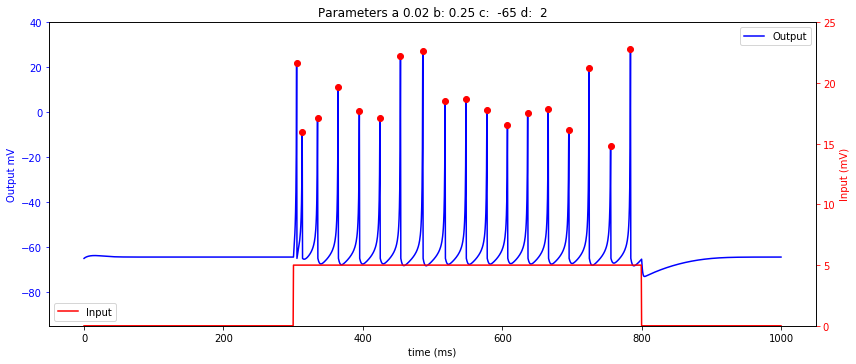

In [159]:
#@title a = 0.02, b = 0.25 , c = -65, d = 2
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 800
input_amp=5 # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = 'no'

##System Parameters##
a = 0.02
b = 0.25
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


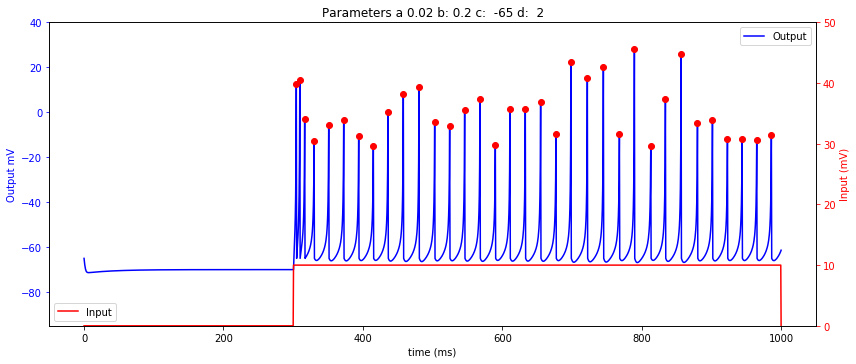

In [97]:
from scipy.signal import find_peaks
#### Model Input
h=0.5 #step size
input_onset_on=300             # Onset of input
input_onset_off = 1000
input_amp=10 # AMPLITUDE OF INPUT
time=np.arange(0,1000.1,h)  # time period 1000ms (1s)
#figure = 'sin'
figure = 'step'
noise = "no"

##System Parameters##
a = 0.02
b = 0.2
c = -65
d = 2

##Generate Plot
Izhikevich(a=a,b=b,c=c,d=d,result="graph") 
##Generate Data
u,v,peaks = Izhikevich(a=a,b=b,c=c,d=d,result="data") 


# Now we are interested in creating a population of N Izhikevich Neurons

In [0]:
neuron_population = {}

for neuron in range(1,5):
  neuron_population["neuron{0}".format(neuron)] = Izhikevich(a=a,b=b,c=c,d=d,result="data") 
  


In [165]:
neuron_population

{'neuron1': (array([-16.25      , -16.2496875 , -16.24909648, ..., -16.10344389,
         -16.10344553, -16.10344709]),
  array([-65.        , -64.875     , -64.76234375, ..., -64.41445594,
         -64.41443117, -64.41440747]),
  (array([ 610,  626,  670,  729,  790,  849,  908,  972, 1036, 1096, 1156,
          1215, 1273, 1332, 1391, 1449, 1511, 1568]),
   {'peak_heights': array([ 21.98040268,  -8.57452857,  -2.62627662,  11.47071637,
             0.54261673,  -2.63585017,  25.20900679,  27.28823244,
             5.19476089,   5.76906   ,   1.02733683,  -5.7632399 ,
            -0.09491398,   1.40902278,  -8.0862878 ,  19.54812581,
           -14.95260405,  28.29906751])})),
 'neuron2': (array([-16.25      , -16.2496875 , -16.24909648, ..., -16.10344389,
         -16.10344553, -16.10344709]),
  array([-65.        , -64.875     , -64.76234375, ..., -64.41445594,
         -64.41443117, -64.41440747]),
  (array([ 610,  626,  670,  729,  790,  849,  908,  972, 1036, 1096, 1156,
        